## Image Access Methods

In [1]:
import tensorflow
import numpy
import IPython
from matplotlib import pyplot
import cv2
import PIL
import os
import random
import pickle

In [2]:
file_name="../Data/train/Facial acne/acne-face-1-8__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg"

In [3]:
image_using_ipython=IPython.display.Image(filename=file_name,width=180,height=180)

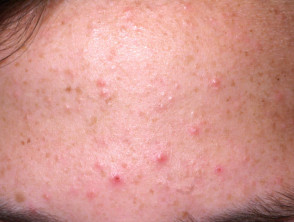

In [4]:
image_using_ipython

In [5]:
image_using_ipython.format

'jpeg'

In [6]:
image_using_tensorflow=tensorflow.keras.preprocessing.image.load_img(file_name,target_size=(180,180))

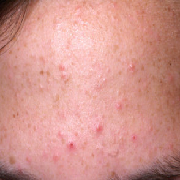

In [7]:
image_using_tensorflow

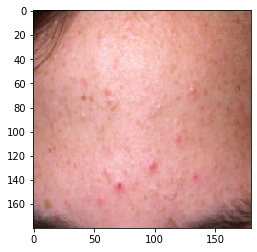

In [8]:
pyplot.imshow(image_using_tensorflow)

In [9]:
image_using_PIL=PIL.Image.open(file_name)

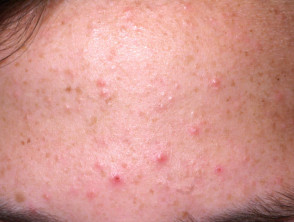

In [10]:
image_using_PIL

In [11]:
image_using_PIL=image_using_PIL.resize((180,180))

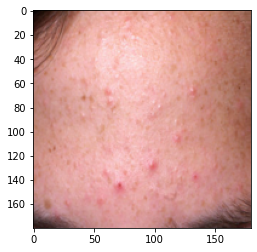

In [12]:
pyplot.imshow(image_using_PIL)

In [13]:
image_using_Open_CV=cv2.imread(file_name)

In [14]:
image_using_Open_CV

array([[[  1,   5,  10],
        [  5,   9,  14],
        [ 11,  14,  19],
        ...,
        [ 78,  96, 143],
        [ 80,  98, 145],
        [ 81,  99, 146]],

       [[  7,  10,  15],
        [  6,   9,  14],
        [  5,   8,  13],
        ...,
        [ 84, 102, 149],
        [ 84, 102, 149],
        [ 82,  99, 148]],

       [[  7,  10,  15],
        [  4,   7,  12],
        [  1,   4,   9],
        ...,
        [ 75,  95, 143],
        [ 74,  94, 142],
        [ 73,  93, 141]],

       ...,

       [[ 22,  26,  44],
        [ 20,  24,  42],
        [ 18,  22,  40],
        ...,
        [ 37,  37,  77],
        [ 40,  39,  81],
        [ 44,  46,  87]],

       [[ 34,  38,  62],
        [ 30,  34,  58],
        [ 26,  28,  52],
        ...,
        [ 56,  55,  94],
        [ 57,  58,  96],
        [ 59,  59,  99]],

       [[ 45,  49,  77],
        [ 42,  45,  73],
        [ 35,  38,  66],
        ...,
        [ 61,  62,  96],
        [ 62,  62,  98],
        [ 62,  62,  98]]

In [15]:
image_using_Open_CV.shape

(222, 294, 3)

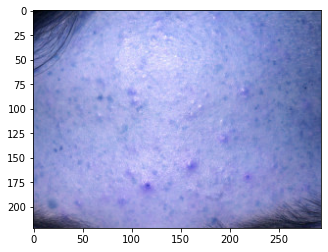

In [16]:
pyplot.imshow(image_using_Open_CV)

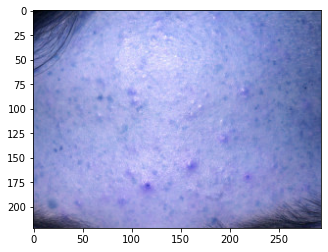

In [17]:
pyplot.imshow(image_using_Open_CV)

In [18]:
image_using_Open_CV=cv2.resize(image_using_Open_CV,(180,180))

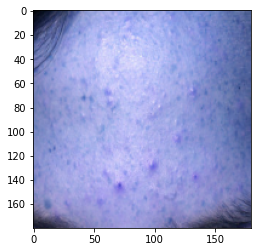

In [19]:
pyplot.imshow(image_using_Open_CV)

In [20]:
image_using_Open_CV=cv2.cvtColor(image_using_Open_CV,cv2.COLOR_BGR2RGB)

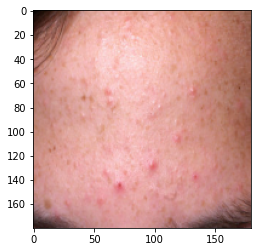

In [21]:
pyplot.imshow(image_using_Open_CV)

In [22]:
image_using_Open_CV.shape

(180, 180, 3)

In [23]:
numpy.expand_dims(image_using_Open_CV,axis=0).shape

(1, 180, 180, 3)

## Final Selected Method

In [2]:
import os
training_data_path="../Data/train"
testing_data_path="../Data/test"


In [3]:
os.listdir(training_data_path)

['Facial acne', 'Melanoma', 'Psoriasis', 'Ringworm', 'Skin Burn']

In [4]:
categories=os.listdir(training_data_path)

In [5]:
categories

['Facial acne', 'Melanoma', 'Psoriasis', 'Ringworm', 'Skin Burn']

Facial acne
2652__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDBd.jpg
[[0.81111111 0.83333333 0.78888889 ... 0.93333333 0.94444444 0.93888889]
 [0.78333333 0.79444444 0.77777778 ... 0.96666667 0.96666667 0.91111111]
 [0.76111111 0.75       0.77777778 ... 0.97222222 0.93333333 0.8       ]
 ...
 [0.42222222 0.41111111 0.4        ... 0.82222222 0.77777778 0.75555556]
 [0.42777778 0.41666667 0.4        ... 0.87222222 0.77777778 0.78888889]
 [0.42777778 0.42222222 0.40555556 ... 0.81666667 0.72222222 0.80555556]]


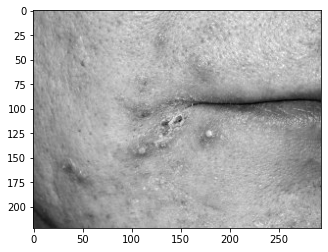

In [18]:
for category in categories:
    print(category)
    category_path=os.path.join(training_data_path,category)
    for image in os.listdir(category_path):
        print(image)
        image_array=cv2.imread(os.path.join(category_path,image),cv2.IMREAD_GRAYSCALE)
        pyplot.imshow(image_array,cmap="gray")
        print(image_array/180)
        break
    break

In [19]:
image_array.shape

(222, 294)

In [20]:
image_array=cv2.resize(image_array,(180,180))

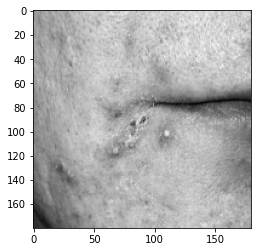

In [21]:
pyplot.imshow(image_array,cmap="gray")

In [10]:
Total_Training_Data=[]

In [13]:

counter=0
for category in categories:
    category_path=os.path.join(training_data_path,category)
    class_index=categories.index(category)
    for image in os.listdir(category_path):
        counter+=1
        try:
            image_array=cv2.imread(os.path.join(category_path,image),cv2.IMREAD_GRAYSCALE)
            image_array=cv2.resize(image_array,(180,180))
            Total_Training_Data.append([image_array/255,class_index])
        except Exception as e:
            pass
#             print(e)
#             break
    print(category)


Facial acne
Melanoma
Psoriasis
Ringworm
Skin Burn


In [14]:
counter

657

In [15]:
Total_Training_Data

[[array([[0.57647059, 0.55686275, 0.54901961, ..., 0.70980392, 0.6627451 ,
          0.6627451 ],
         [0.54901961, 0.54901961, 0.55686275, ..., 0.70980392, 0.68235294,
          0.63529412],
         [0.53333333, 0.54509804, 0.56470588, ..., 0.70980392, 0.69803922,
          0.61568627],
         ...,
         [0.29019608, 0.27843137, 0.26666667, ..., 0.60392157, 0.58823529,
          0.54509804],
         [0.29803922, 0.28235294, 0.26666667, ..., 0.59215686, 0.6       ,
          0.54901961],
         [0.29803922, 0.28627451, 0.26666667, ..., 0.58039216, 0.57647059,
          0.54901961]]),
  0],
 [array([[0.83921569, 0.83921569, 0.83137255, ..., 0.9372549 , 0.9372549 ,
          0.9254902 ],
         [0.83529412, 0.83529412, 0.83137255, ..., 0.92941176, 0.92941176,
          0.92156863],
         [0.83137255, 0.83921569, 0.83529412, ..., 0.9254902 , 0.9254902 ,
          0.91764706],
         ...,
         [0.55686275, 0.53333333, 0.54901961, ..., 0.74509804, 0.74509804,
       

In [16]:
for image_array_value,category_class in Total_Training_Data:
    print(category_class)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [17]:
len(Total_Training_Data)

656

In [18]:
random.shuffle(Total_Training_Data)

In [19]:
Total_Training_Data

[[array([[0.17254902, 0.17254902, 0.18039216, ..., 0.16862745, 0.16078431,
          0.15686275],
         [0.17254902, 0.17254902, 0.17254902, ..., 0.16078431, 0.16078431,
          0.16470588],
         [0.16862745, 0.16862745, 0.17254902, ..., 0.16470588, 0.16470588,
          0.16470588],
         ...,
         [0.11372549, 0.10980392, 0.12156863, ..., 0.12941176, 0.12156863,
          0.12156863],
         [0.11372549, 0.10980392, 0.12156863, ..., 0.12941176, 0.1254902 ,
          0.1254902 ],
         [0.11764706, 0.10980392, 0.12156863, ..., 0.14117647, 0.13333333,
          0.13333333]]),
  0],
 [array([[0.77254902, 0.78431373, 0.8       , ..., 0.74901961, 0.74117647,
          0.73333333],
         [0.79215686, 0.78431373, 0.8       , ..., 0.73333333, 0.74117647,
          0.73333333],
         [0.8       , 0.77647059, 0.78039216, ..., 0.7372549 , 0.7254902 ,
          0.74117647],
         ...,
         [0.76470588, 0.76078431, 0.81568627, ..., 0.76470588, 0.76862745,
       

In [20]:
Training_Data=[]
Training_Class=[]
for image_array_value,category_class in Total_Training_Data:
    Training_Data.append(image_array_value)
    Training_Class.append(category_class)

In [21]:
Training_Class

[0,
 1,
 3,
 2,
 4,
 0,
 3,
 0,
 2,
 1,
 1,
 3,
 0,
 3,
 3,
 1,
 0,
 3,
 0,
 2,
 0,
 0,
 3,
 0,
 3,
 4,
 3,
 1,
 3,
 0,
 3,
 1,
 3,
 4,
 0,
 3,
 0,
 4,
 1,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 1,
 1,
 1,
 0,
 3,
 0,
 0,
 1,
 3,
 3,
 4,
 0,
 3,
 3,
 2,
 0,
 2,
 2,
 0,
 0,
 3,
 2,
 4,
 0,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 0,
 0,
 1,
 1,
 1,
 4,
 2,
 1,
 3,
 1,
 0,
 4,
 2,
 0,
 3,
 0,
 3,
 4,
 3,
 0,
 1,
 3,
 0,
 3,
 0,
 0,
 2,
 3,
 0,
 0,
 2,
 3,
 3,
 2,
 1,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 3,
 0,
 1,
 0,
 2,
 3,
 3,
 0,
 3,
 3,
 2,
 3,
 4,
 0,
 0,
 2,
 2,
 1,
 3,
 2,
 1,
 1,
 2,
 0,
 0,
 2,
 3,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 0,
 2,
 3,
 3,
 2,
 0,
 4,
 0,
 3,
 1,
 3,
 0,
 0,
 3,
 1,
 0,
 3,
 0,
 1,
 3,
 1,
 2,
 3,
 2,
 0,
 3,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 4,
 2,
 1,
 0,
 3,
 0,
 3,
 2,
 0,
 0,
 2,
 0,
 0,
 3,
 1,
 3,
 2,
 0,
 3,
 0,
 0,
 2,
 3,
 1,
 2,
 3,
 1,
 4,
 1,
 0,
 1,
 0,
 4,
 1,
 1,
 2,
 0,
 0,
 2,
 3,
 3,
 0,
 1,
 2,
 2,
 0,
 4,
 3,
 1,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 3,


In [22]:
Training_Data

[array([[0.17254902, 0.17254902, 0.18039216, ..., 0.16862745, 0.16078431,
         0.15686275],
        [0.17254902, 0.17254902, 0.17254902, ..., 0.16078431, 0.16078431,
         0.16470588],
        [0.16862745, 0.16862745, 0.17254902, ..., 0.16470588, 0.16470588,
         0.16470588],
        ...,
        [0.11372549, 0.10980392, 0.12156863, ..., 0.12941176, 0.12156863,
         0.12156863],
        [0.11372549, 0.10980392, 0.12156863, ..., 0.12941176, 0.1254902 ,
         0.1254902 ],
        [0.11764706, 0.10980392, 0.12156863, ..., 0.14117647, 0.13333333,
         0.13333333]]),
 array([[0.77254902, 0.78431373, 0.8       , ..., 0.74901961, 0.74117647,
         0.73333333],
        [0.79215686, 0.78431373, 0.8       , ..., 0.73333333, 0.74117647,
         0.73333333],
        [0.8       , 0.77647059, 0.78039216, ..., 0.7372549 , 0.7254902 ,
         0.74117647],
        ...,
        [0.76470588, 0.76078431, 0.81568627, ..., 0.76470588, 0.76862745,
         0.78039216],
        [0.8

In [23]:
len(Training_Data)

656

In [24]:
len(Training_Class)

656

In [25]:
features=numpy.array(Training_Data)

In [26]:
features

array([[[0.17254902, 0.17254902, 0.18039216, ..., 0.16862745,
         0.16078431, 0.15686275],
        [0.17254902, 0.17254902, 0.17254902, ..., 0.16078431,
         0.16078431, 0.16470588],
        [0.16862745, 0.16862745, 0.17254902, ..., 0.16470588,
         0.16470588, 0.16470588],
        ...,
        [0.11372549, 0.10980392, 0.12156863, ..., 0.12941176,
         0.12156863, 0.12156863],
        [0.11372549, 0.10980392, 0.12156863, ..., 0.12941176,
         0.1254902 , 0.1254902 ],
        [0.11764706, 0.10980392, 0.12156863, ..., 0.14117647,
         0.13333333, 0.13333333]],

       [[0.77254902, 0.78431373, 0.8       , ..., 0.74901961,
         0.74117647, 0.73333333],
        [0.79215686, 0.78431373, 0.8       , ..., 0.73333333,
         0.74117647, 0.73333333],
        [0.8       , 0.77647059, 0.78039216, ..., 0.7372549 ,
         0.7254902 , 0.74117647],
        ...,
        [0.76470588, 0.76078431, 0.81568627, ..., 0.76470588,
         0.76862745, 0.78039216],
        [0.8

In [27]:
features.shape

(656, 180, 180)

In [28]:
features.reshape(-1,180,180,1).shape

(656, 180, 180, 1)

In [29]:
features.shape

(656, 180, 180)

In [30]:
labels=Training_Class

In [31]:
pickle_fetures=open("../Data/objects/pickle_fetures.pickle","wb")
pickle.dump(features,pickle_fetures)
pickle_fetures.close()

In [32]:
pickle_labels=open("../Data/objects/pickle_labels.pickle","wb")
pickle.dump(labels,pickle_labels)
pickle_labels.close()

In [33]:
loaded_pickle_features=open("../Data/objects/pickle_fetures.pickle","rb")
loaded_features=pickle.load(loaded_pickle_features)
loaded_pickle_features.close()

In [34]:
loaded_pickle_labels=open("../Data/objects/pickle_labels.pickle","rb")
loaded_labels=pickle.load(loaded_pickle_labels)
loaded_pickle_labels.close()

In [35]:
loaded_features

array([[[0.17254902, 0.17254902, 0.18039216, ..., 0.16862745,
         0.16078431, 0.15686275],
        [0.17254902, 0.17254902, 0.17254902, ..., 0.16078431,
         0.16078431, 0.16470588],
        [0.16862745, 0.16862745, 0.17254902, ..., 0.16470588,
         0.16470588, 0.16470588],
        ...,
        [0.11372549, 0.10980392, 0.12156863, ..., 0.12941176,
         0.12156863, 0.12156863],
        [0.11372549, 0.10980392, 0.12156863, ..., 0.12941176,
         0.1254902 , 0.1254902 ],
        [0.11764706, 0.10980392, 0.12156863, ..., 0.14117647,
         0.13333333, 0.13333333]],

       [[0.77254902, 0.78431373, 0.8       , ..., 0.74901961,
         0.74117647, 0.73333333],
        [0.79215686, 0.78431373, 0.8       , ..., 0.73333333,
         0.74117647, 0.73333333],
        [0.8       , 0.77647059, 0.78039216, ..., 0.7372549 ,
         0.7254902 , 0.74117647],
        ...,
        [0.76470588, 0.76078431, 0.81568627, ..., 0.76470588,
         0.76862745, 0.78039216],
        [0.8

In [36]:
loaded_labels

[0,
 1,
 3,
 2,
 4,
 0,
 3,
 0,
 2,
 1,
 1,
 3,
 0,
 3,
 3,
 1,
 0,
 3,
 0,
 2,
 0,
 0,
 3,
 0,
 3,
 4,
 3,
 1,
 3,
 0,
 3,
 1,
 3,
 4,
 0,
 3,
 0,
 4,
 1,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 1,
 1,
 1,
 0,
 3,
 0,
 0,
 1,
 3,
 3,
 4,
 0,
 3,
 3,
 2,
 0,
 2,
 2,
 0,
 0,
 3,
 2,
 4,
 0,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 0,
 0,
 1,
 1,
 1,
 4,
 2,
 1,
 3,
 1,
 0,
 4,
 2,
 0,
 3,
 0,
 3,
 4,
 3,
 0,
 1,
 3,
 0,
 3,
 0,
 0,
 2,
 3,
 0,
 0,
 2,
 3,
 3,
 2,
 1,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 3,
 0,
 1,
 0,
 2,
 3,
 3,
 0,
 3,
 3,
 2,
 3,
 4,
 0,
 0,
 2,
 2,
 1,
 3,
 2,
 1,
 1,
 2,
 0,
 0,
 2,
 3,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 0,
 2,
 3,
 3,
 2,
 0,
 4,
 0,
 3,
 1,
 3,
 0,
 0,
 3,
 1,
 0,
 3,
 0,
 1,
 3,
 1,
 2,
 3,
 2,
 0,
 3,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 4,
 2,
 1,
 0,
 3,
 0,
 3,
 2,
 0,
 0,
 2,
 0,
 0,
 3,
 1,
 3,
 2,
 0,
 3,
 0,
 0,
 2,
 3,
 1,
 2,
 3,
 1,
 4,
 1,
 0,
 1,
 0,
 4,
 1,
 1,
 2,
 0,
 0,
 2,
 3,
 3,
 0,
 1,
 2,
 2,
 0,
 4,
 3,
 1,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 3,


In [37]:
len(loaded_features)

656

In [38]:
len(loaded_labels)

656

In [39]:
testing_categories=os.listdir(testing_data_path)
Total_Testing_data=[]

for testing_category in testing_categories:
    testing_category_path=os.path.join(testing_data_path,testing_category)
    class_index=testing_categories.index(testing_category)
    for image in os.listdir(testing_category_path):
        try:
            image_array=cv2.imread(os.path.join(testing_category_path,image),cv2.IMREAD_GRAYSCALE)
            image_array=cv2.resize(image_array,(180,180))
            Total_Testing_data.append([image_array/255,class_index])
        except Exception as e:
            pass
#             print(e)
#             break
    print(testing_category)


Facial acne
Melanoma
Psoriasis
Ringworm
Skin Burn


In [40]:
random.shuffle(Total_Testing_data)

In [41]:
Testing_Data=[]
Testing_Class=[]
for image_array_value,category_class in Total_Testing_data:
    Testing_Data.append(image_array_value)
    Testing_Class.append(category_class)

In [42]:
len(Testing_Data)

119

In [43]:
len(Testing_Class)

119

In [44]:
Testing_Class

[3,
 4,
 3,
 2,
 0,
 3,
 2,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 2,
 1,
 2,
 3,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 3,
 2,
 1,
 3,
 4,
 4,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 1,
 2,
 4,
 1,
 2,
 3,
 1,
 2,
 2,
 3,
 1,
 4,
 1,
 1,
 2,
 3,
 3,
 2,
 4,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 1,
 2,
 3,
 1,
 2,
 0,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 0,
 3,
 1,
 1,
 0,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 4,
 3,
 3,
 2,
 2,
 1,
 4,
 2,
 2,
 2,
 3,
 4,
 1,
 2,
 0,
 3,
 1,
 3,
 0,
 3]

In [45]:
testing_features=numpy.array(Testing_Data)

In [46]:
testing_features

array([[[0.96862745, 0.96862745, 0.96862745, ..., 0.91372549,
         0.91372549, 0.9254902 ],
        [0.96862745, 0.96862745, 0.96862745, ..., 0.91372549,
         0.91372549, 0.9254902 ],
        [0.96862745, 0.96862745, 0.96862745, ..., 0.90980392,
         0.90980392, 0.92156863],
        ...,
        [0.97254902, 0.92156863, 0.82745098, ..., 0.99607843,
         0.99607843, 1.        ],
        [0.98431373, 0.87843137, 0.76862745, ..., 1.        ,
         1.        , 0.99607843],
        [0.99607843, 0.97647059, 0.95686275, ..., 0.99607843,
         0.99607843, 1.        ]],

       [[0.78039216, 0.78431373, 0.78823529, ..., 0.18823529,
         0.16862745, 0.16078431],
        [0.78431373, 0.78823529, 0.79215686, ..., 0.18823529,
         0.17254902, 0.16862745],
        [0.78431373, 0.78823529, 0.8       , ..., 0.18039216,
         0.16862745, 0.16078431],
        ...,
        [0.02745098, 0.01960784, 0.01960784, ..., 0.17254902,
         0.22352941, 0.23529412],
        [0.0

In [47]:
testing_features.shape

(119, 180, 180)

In [48]:
pickle_testing_fetures=open("../Data/objects/pickle_testing_fetures.pickle","wb")
pickle.dump(testing_features,pickle_testing_fetures)
pickle_testing_fetures.close()

pickle_testing_labels=open("../Data/objects/pickle_testing_labels.pickle","wb")
pickle.dump(Testing_Class,pickle_testing_labels)
pickle_testing_labels.close()

In [49]:
loaded_pickle_testing_features=open("../Data/objects/pickle_testing_fetures.pickle","rb")
loaded_testing_features=pickle.load(loaded_pickle_testing_features)
loaded_pickle_testing_features.close()
loaded_pickle_testing_labels=open("../Data/objects/pickle_testing_labels.pickle","rb")
loaded__testing_labels=pickle.load(loaded_pickle_testing_labels)
loaded_pickle_testing_labels.close()

In [50]:
loaded_testing_features

array([[[0.96862745, 0.96862745, 0.96862745, ..., 0.91372549,
         0.91372549, 0.9254902 ],
        [0.96862745, 0.96862745, 0.96862745, ..., 0.91372549,
         0.91372549, 0.9254902 ],
        [0.96862745, 0.96862745, 0.96862745, ..., 0.90980392,
         0.90980392, 0.92156863],
        ...,
        [0.97254902, 0.92156863, 0.82745098, ..., 0.99607843,
         0.99607843, 1.        ],
        [0.98431373, 0.87843137, 0.76862745, ..., 1.        ,
         1.        , 0.99607843],
        [0.99607843, 0.97647059, 0.95686275, ..., 0.99607843,
         0.99607843, 1.        ]],

       [[0.78039216, 0.78431373, 0.78823529, ..., 0.18823529,
         0.16862745, 0.16078431],
        [0.78431373, 0.78823529, 0.79215686, ..., 0.18823529,
         0.17254902, 0.16862745],
        [0.78431373, 0.78823529, 0.8       , ..., 0.18039216,
         0.16862745, 0.16078431],
        ...,
        [0.02745098, 0.01960784, 0.01960784, ..., 0.17254902,
         0.22352941, 0.23529412],
        [0.0

In [51]:
loaded__testing_labels

[3,
 4,
 3,
 2,
 0,
 3,
 2,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 2,
 1,
 2,
 3,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 3,
 2,
 1,
 3,
 4,
 4,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 1,
 2,
 4,
 1,
 2,
 3,
 1,
 2,
 2,
 3,
 1,
 4,
 1,
 1,
 2,
 3,
 3,
 2,
 4,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 1,
 2,
 3,
 1,
 2,
 0,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 0,
 3,
 1,
 1,
 0,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 4,
 3,
 3,
 2,
 2,
 1,
 4,
 2,
 2,
 2,
 3,
 4,
 1,
 2,
 0,
 3,
 1,
 3,
 0,
 3]